<a href="https://colab.research.google.com/github/mcheung2016/newrepo/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project: Yelp Business and Customer Data Analytics

This project aims to perform data analytics upon data from Yelp, and formulate
customer-oriented strategies for both Yelp and participating local businesses.

**Group members and work breakdown:**

* *Max Cheung* - Data processing and modeling
* *Haoning Gong* - Data processing, adding narratives, data modeling
* *Vaibhav Verma* - Data visualization and presentation

We are doing **Track 2** so that our objectives are:

1. Building a regression model to predict the rating a customer would like to give.
2. Find out the most important feature for the rating.
3. How can business interpret the result.

## 1 Data Preparation

### 1.1 Import Python packages and read data from csv files

First we need to import required Python packages for this project.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Then we read `user.csv` as `user_df`, `review.csv` as `review_df`, `business.csv` as `business_df`.

**Warning:** Since Colab will destroy attached files after disconnecting to the runtime, we need to upload the files needed each time running this notebook.

In [ ]:
user_df = pd.read_csv('user.csv')
review_df = pd.read_csv('review.csv')
business_df = pd.read_csv('business.csv')

<ipython-input-41-b58fc4f294d6>:3: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  business_df = pd.read_csv('business.csv')


Check the first 5 rows for each dataset imported.

In [ ]:
user_df.head()

,user_id,compliment_plain,funny,name,average_stars,review_count,useful,compliment_profile,compliment_more,compliment_list,...,friends,compliment_cute,yelping_since,cool,fans,compliment_hot,elite,compliment_cool,compliment_funny,compliment_writer
0,j14WgRoU_-2ZE1aw1dXrJg,7054,13066,Daniel,3.74,4333,43091,184,264,251,...,"BW_Lpb14P7CTQwHlaek0_w,Lpcd2GQEkAzFoMfP8vUYWw,...",157,2009-01-25 04:35:42,27281,3138,1145,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3131,3131,1521
1,E9kcWJdJUHuTKfQurPljwA,6,102,Mike,3.73,358,399,2,7,0,...,"3YRIaEjOPoBEz4xoXaJ1jQ,HzeVbLwHoWdNGA1IYWJ-nw",0,2008-12-11 22:11:56,143,23,4,NaN,12,12,5
2,MGPQVLsODMm9ZtYQW-g_OA,3396,10461,Jelena,4.06,1807,17331,206,167,130,...,"cEDMie5DjE_00sJ23H2q9Q,7an-zIbFKvGxjpeNN9H9ow,...",395,2008-01-19 22:50:00,13734,828,2177,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...",1915,1915,696
3,rppTTi-kfF8-qyiArNemag,23,149,Helen,3.33,460,700,2,11,0,...,"olLL4rSOwJcYn--fGisiFA,nnImk681KaRqUVHlSfZjGQ,...",2,2006-01-24 14:33:32,425,49,25,"2010,2012,2013,2014,2015,2016,2017,2018",43,43,20
4,KYBEVBAP7QUlt1LjmatTJg,117,1982,Matthew,3.81,460,1500,29,34,27,...,"vt4nvD7FNvIMel47ikMifQ,EVlNHC3J1Y46LN4fkTwfvA,...",58,2007-07-12 14:46:03,1210,63,256,"2008,2009,2010,2011",230,230,54


Here is the metadata for `user_df`:

* **user_id**: string, 22 character unique user id, maps to the user in user.json
* **name**: string, the user's first name
* **review_count**: integer, the number of reviews they've written * yelping_since: string, when the user joined Yelp, formatted like YYYY-MM-DD
* **friends**: array of strings, an array of the user's friend as user_ids
* **useful**: integer, number of useful votes sent by the user
* **funny**: integer, number of funny votes sent by the user
* **cool**: integer, number of cool votes sent by the user
* **fans**: integer, number of fans the user has
* **elite**: array of integers, the years the user was elite
* **average_stars**: float, average rating of all reviews compliment_hot: integer, number of hot compliments received by the user
* **compliment_more**: integer, number of more compliments received by the user
* **compliment_profile**: integer, number of profile compliments received by the user
* **compliment_cute**: integer, number of cute compliments received by the user
* **compliment_list**: integer, number of list compliments received by the user
* **compliment_note**: integer, number of note compliments received by the user
* **compliment_plain**: integer, number of plain compliments received by the user
* **compliment_cool**: integer, number of cool compliments received by the user
* **compliment_funny**: integer, number of funny compliments received by the user
* **compliment_writer**: integer, number of writer compliments received by the user
* **compliment_photos**: integer, number of photo compliments received by the user

In [ ]:
review_df.head()

,business_id,funny,user_id,stars,review_id,cool,useful,date,text
0,zsk5qJ179aZvgtz62JCj7A,0,9oUt200IoLaHBrJWKz77yQ,5.0,V6O072D-Zmn_5zXG1yIe3g,0,0,2020-06-08 05:16:35,The staff was super friendly and the bikes wer...
1,QCPhg4xl22h2IuCKGmkaNw,0,fCtPVdTI8zDbgwNdI--tnw,1.0,wbmfZlPAEr1Vtgki8xlsnw,0,0,2018-07-29 21:13:35,Worst customer service I have ever experienced...
2,63OsIhZ4XVRVLq0LUUXUIg,0,3b8bc-2fwvatCCNncLqsrg,1.0,cYrTgARUjKGGKH0LUe5BFQ,0,3,2018-06-20 19:13:10,Crooks. All the negative reviews here are righ...
3,QkHF8eeJx9R7S95ifUtDIw,1,drDnd-DrI1svoT1lopOWdw,5.0,qSG2reK_J9Hosyyx3WYv7Q,0,0,2019-03-18 17:59:37,"Honest, timely and respectful people. Great w..."
4,mhrW9O0O5hXGXGnEYBVoag,1,5dbgriguf-7KM50FfQ_WEw,5.0,AwIxkLYkbksnfFoXJuJcVg,0,0,2017-04-22 02:49:21,Totally amazing meal. Fantastic service. Go to...


Here is the metadata for `review_df`:

* **review_id**: string, 22 character unique review id
* **user_id**: string, 22 character unique user id, maps to the user in user.json
* **business_id**: string, 22 character business id, maps to business in business.json
* **stars**: integer, star rating
* **date**: string, date formatted YYYY-MM-DD
* **text**: string, the review itself
* **useful**: integer, number of useful votes received
* **funny**: integer, number of funny votes received
* **cool**: integer, number of cool votes received

In [ ]:
business_df.head()

,attributes.GoodForMeal,hours.Wednesday,stars,attributes.NoiseLevel,hours.Monday,attributes.DietaryRestrictions,hours.Tuesday,hours.Sunday,attributes.RestaurantsGoodForGroups,attributes.DriveThru,...,attributes.Music,attributes.DogsAllowed,attributes.AcceptsInsurance,attributes.ByAppointmentOnly,hours.Friday,review_count,attributes.GoodForKids,attributes.BusinessParking,attributes.BYOBCorkage,attributes.HairSpecializesIn
0,NaN,7:0-20:0,4.0,NaN,7:0-20:0,NaN,7:0-20:0,7:0-21:0,NaN,NaN,...,NaN,NaN,NaN,False,7:0-21:0,80,NaN,"{'garage': False, 'street': True, 'validated':...",NaN,NaN
1,"{'dessert': False, 'latenight': False, 'lunch'...",10:0-20:0,4.5,u'average',10:0-18:0,NaN,10:0-20:0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,10:0-20:0,100,True,"{'garage': False, 'street': False, 'validated'...",NaN,NaN
2,"{'dessert': True, 'latenight': None, 'lunch': ...",13:30-22:0,4.0,u'average',NaN,NaN,13:30-22:0,13:30-22:0,True,NaN,...,NaN,False,NaN,NaN,13:30-23:0,245,False,"{u'valet': False, u'garage': None, u'street': ...",NaN,NaN
3,"{'dessert': False, 'latenight': False, 'lunch'...",11:30-20:30,4.5,u'quiet',11:30-20:30,NaN,11:30-20:30,NaN,False,NaN,...,NaN,NaN,NaN,NaN,11:30-20:30,205,True,"{'garage': False, 'street': True, 'validated':...",NaN,NaN
4,NaN,8:0-18:0,4.0,u'average',8:0-18:0,NaN,8:0-18:0,10:0-17:0,True,NaN,...,NaN,NaN,NaN,NaN,8:0-18:0,40,False,"{'garage': False, 'street': True, 'validated':...",NaN,NaN


Here is the metadata for `business_df`:

* **business_id**: string, 22 character unique string business id
* **name**: string, the business's name
* **address**: string, the full address of the business
* **city**: string, the city
* **state**: string, 2 character state code, if applicable
* **postal code**: string, the postal code
* **latitude**: float, latitude
* **longitude**: float, longitude
* **stars**: float, star rating, rounded to half-stars
* **review_count**: integer, number of reviews
* **is_open**: integer, 0 or 1 for closed or open, respectively
* **categories**: an array of strings of business categories
* **RestaurantsTakeOut**: boolean, true if take out is available, false otherwise
* **BusinessParking_garage**: boolean, true if garage parking is available, false otherwise
* **BusinessParking_street**: boolean, true if street parking is available, false otherwise
* **BusinessParking_validated**: boolean, true if validated parking is available, false otherwise
* **BusinessParking_lot**: boolean, true if parking lot is available, false otherwise
* **BusinessParking_valet**: boolean, true if valet parking is available, false otherwise
* **hours_monday** : string, monday operating hours, hours are using a 24hr clock
* **hours_tuesday** : string, tuesday operating hours, hours are using a 24hr clock
* **hours_wednesday** : string, wednesday operating hours, hours are using a 24hr clock
* **hours_thursday** : string, thursday operating hours, hours are using a 24hr clock
* **hours_friday** : string, friday operating hours, hours are using a 24hr clock
* **hours_saturday** : string, saturday operating hours, hours are using a 24hr clock
* **hours_sunday** : string, sunday operating hours, hours are using a 24hr clock
* **attributes** : a large variety of attributes describing details of business operation characteristics (e.g. ambiance, whether WIFI is provided, whether there is takeout, etc.), please refer to the csv file for more details

### 1.2 Data Cleansing

#### 1.2.1 Processing business_df

It can be found that we have redundant attributes in `business_df`.

In [ ]:
business_df.shape

(29527, 60)

We have detected `60` attributes in `business_df`.

In order to ensure the model performance, attributes with nested values and geographical information are dropped, and attributes indicating the working hours are kept.

In [ ]:
business_df_clean = business_df[['business_id',
                                 'name',
                                 'review_count',
                                 'stars',
                                 'is_open',
                                 'hours.Monday',
                                 'hours.Tuesday',
                                 'hours.Wednesday',
                                 'hours.Thursday',
                                 'hours.Friday',
                                 'hours.Saturday',
                                 'hours.Sunday',
                                 'attributes.NoiseLevel',
                                 'attributes.DietaryRestrictions',
                                 'attributes.RestaurantsGoodForGroups',
                                 'attributes.DriveThru',
                                 'attributes.WheelchairAccessible',
                                 'attributes.RestaurantsReservations',
                                 'attributes.WiFi',
                                 'attributes.BusinessAcceptsBitcoin',
                                 'attributes.BYOB',
                                 'attributes.BikeParking',
                                 'attributes.BusinessAcceptsCreditCards',
                                 'attributes.HasTV',
                                 'attributes.Alcohol',
                                 'attributes.GoodForDancing',
                                 'attributes.Smoking',
                                 'attributes.RestaurantsPriceRange2',
                                 'attributes.RestaurantsCounterService',
                                 'attributes.OutdoorSeating',
                                 'attributes.RestaurantsAttire',
                                 'attributes.AgesAllowed',
                                 'attributes.Open24Hours',
                                 'attributes.RestaurantsTableService',
                                 'attributes.CoatCheck',
                                 'attributes.Caters',
                                 'attributes.RestaurantsDelivery',
                                 'attributes.HappyHour',
                                 'attributes.Corkage',
                                 'attributes.DogsAllowed',
                                 'attributes.AcceptsInsurance',
                                 'attributes.ByAppointmentOnly',
                                 'attributes.GoodForKids']].copy()

Meanwhile, since we have `stars` in `review_df` that represents individual ratins, we need to rename `stars`, `name`, `review_count` with suffix.

In [ ]:
business_df_clean.rename(columns={"stars" : "average_stars_business",
                                  "name" : "name_business",
                                  "review_count" : "review_count_business"},
                         inplace=True)

Then we check the `NA` values for each column.

In [ ]:
business_df_clean.isna().sum().sort_values(ascending=False)

business_id                                  0
name_business                                0
review_count_business                        0
average_stars_business                       0
is_open                                      0
hours.Monday                              5401
hours.Tuesday                             4253
hours.Wednesday                           3173
hours.Thursday                            2749
hours.Friday                              2671
hours.Saturday                            4178
hours.Sunday                              8983
attributes.NoiseLevel                    14312
attributes.DietaryRestrictions           29510
attributes.RestaurantsGoodForGroups      13865
attributes.DriveThru                     27085
attributes.WheelchairAccessible          20713
attributes.RestaurantsReservations       13621
attributes.WiFi                          11004
attributes.BusinessAcceptsBitcoin        24564
attributes.BYOB                          27328
attributes.Bi

In order to not introducing significant bias to our model, we decided to keep attributes with less than `40%` values that are `NA`. In other words, attributes with more than `11810` `NA` values will be dropped.

At the same time, the operation hours of the business are also dropped.

In [ ]:
business_df_clean = business_df_clean[['business_id',
                                       'name_business',
                                       'review_count_business',
                                       'average_stars_business',
                                       'is_open',
                                       'attributes.WiFi',
                                       'attributes.BikeParking',
                                       'attributes.BusinessAcceptsCreditCards',
                                       'attributes.RestaurantsPriceRange2',
                                       'attributes.RestaurantsDelivery']]

Then we drop entries with `NA` values and check how many entries are left in the new dataset `business_df_clean`.

In [ ]:
business_df_clean = business_df_clean.dropna()
business_df_clean.shape

(13374, 10)

There are `9239` entries with valid information.

By looking at characteristics of colums with prefix of `atttributes`, we need to clean the irrelevant characters in each cell and factorize the attribute for further machine learning operations.

In [ ]:
# Clean the unexpected characters in attributes
business_df_clean['attributes.WiFi'] = business_df_clean['attributes.WiFi'].str.strip("u'")
# Replace the unexpected boolean values with strings
business_df_clean['attributes.BusinessAcceptsCreditCards'].replace(True, 'True', inplace=True)
business_df_clean['attributes.BusinessAcceptsCreditCards'].replace(False, 'False', inplace=True)
# Replace the unexpected float numbers with strings
business_df_clean['attributes.RestaurantsPriceRange2'].replace(1.0, '1', inplace=True)
business_df_clean['attributes.RestaurantsPriceRange2'].replace(2.0, '2', inplace=True)
business_df_clean['attributes.RestaurantsPriceRange2'].replace(3.0, '3', inplace=True)
business_df_clean['attributes.RestaurantsPriceRange2'].replace(4.0, '4', inplace=True)

In [ ]:
# Factorize attributes.WiFi
codes_wifi, uniques_wifi = pd.factorize(business_df_clean['attributes.WiFi'])
business_df_clean['attributes.WiFi'] = codes_wifi
# Factorize attributes.BikeParking
codes_bike, uniques_bike = pd.factorize(business_df_clean['attributes.BikeParking'])
business_df_clean['attributes.BikeParking'] = codes_bike
# Factorize attributes.BusinessAcceptsCreditCards
codes_credit, uniques_credit = pd.factorize(business_df_clean['attributes.BusinessAcceptsCreditCards'])
business_df_clean['attributes.BusinessAcceptsCreditCards'] = codes_credit
# Factorize attributes.RestaurantsPriceRange2
codes_price, uniques_price = pd.factorize(business_df_clean['attributes.RestaurantsPriceRange2'])
business_df_clean['attributes.RestaurantsPriceRange2'] = codes_price
# Factorize attributes.RestaurantsDelivery
codes_delivery, uniques_delivery = pd.factorize(business_df_clean['attributes.RestaurantsDelivery'])
business_df_clean['attributes.RestaurantsDelivery'] = codes_delivery

Finally, we can have a look at the data for any errors.

In [ ]:
business_df_clean.head()

,business_id,name_business,review_count_business,average_stars_business,is_open,attributes.WiFi,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsPriceRange2,attributes.RestaurantsDelivery
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,80,4.0,1,0,0,0,0,0
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,100,4.5,0,1,0,1,0,1
3,ROeacJQwBeh05Rqg7F6TCg,BAP,205,4.5,1,1,0,1,0,2
5,9OG5YkX1g2GReZM0AskizA,Romano's Macaroni Grill,339,2.5,1,0,0,1,1,1
7,QdN72BWoyFypdGJhhI5r7g,Bar One,65,4.0,0,0,0,1,1,1


#### 1.2.2 Processing review_df

Since the timestamp and review contents are not a focus in this project, `date` and `text` columns in `review_df` are dropped.

In [ ]:
review_df_clean = review_df[['business_id',
                             'funny',
                             'user_id',
                             'stars',
                             'review_id',
                             'useful']].copy()

Then we need to check out the `NA` values in `review_df_clean`.

In [ ]:
review_df_clean.isna().sum()

business_id    0
funny          0
user_id        0
stars          0
review_id      0
useful         0
dtype: int64

It is good and we can proceed directly.

#### 1.2.3 Processing user_df

For `user_df`, `friends` is not relative to this project since we are not interested in the relationships between entries. And we can also drop `elite` since it has nested values.

In [ ]:
user_df_clean = user_df[['user_id',
                         'name',
                         'compliment_plain',
                         'average_stars',
                         'review_count',
                         'cool',
                         'fans',
                         'funny',
                         'useful',
                         'compliment_profile',
                         'compliment_more',
                         'compliment_list',
                         'compliment_note',
                         'compliment_photos',
                         'compliment_cute',
                         'yelping_since',
                         'compliment_hot',
                         'compliment_cool',
                         'compliment_funny',
                         'compliment_writer']].copy()


Meanwhile, since we have `funny`, `useful` in `review_df_clean`, we need to rename those 2 columns in `user_df_clean`.

In [ ]:
user_df_clean.rename(columns={"funny": "total_funny",
                              "useful" : "total_useful"},
                     inplace=True)

We may also need to add suffix to `average_stars` in order not to mess up with `average_stars_business` in `business_df_clean`.

In [ ]:
user_df_clean.rename(columns={"average_stars": "average_stars_users",
                              "name" : "name_users",
                              "review_count" : "review_count_users"}, inplace=True)

Then we can replace the `yelping_since` with the years the user has joined Yelp.

In [ ]:
user_df_clean['yelping_since'] = pd.to_datetime(user_df_clean['yelping_since'])
# Calculate the years the user has joined Yelp till 2024
user_df_clean['yelping_since_year'] = 2024 - user_df_clean['yelping_since'].dt.year
user_df_clean.drop(columns=['yelping_since'], inplace=True)

Then we need to check out the `NA` values in `user_df_clean`.

In [ ]:
user_df_clean.isna().sum()

user_id                0
name_users             0
compliment_plain       0
average_stars_users    0
review_count_users     0
cool                   0
fans                   0
total_funny            0
total_useful           0
compliment_profile     0
compliment_more        0
compliment_list        0
compliment_note        0
compliment_photos      0
compliment_cute        0
compliment_hot         0
compliment_cool        0
compliment_funny       0
compliment_writer      0
yelping_since_year     0
dtype: int64

It is good and we can proceed directly.

## 2 Data Modeling

### 2.1 Merge the dataset for modeling

We can use `review_df_clean` as the proxy to combine both `business_df_clean` and `user_df_clean`.

In [ ]:
# Merge review_df_clean and business_df_clean
business_review_df = pd.merge(review_df_clean,
                              business_df_clean,
                              on='business_id',
                              how='inner')

In [ ]:
business_review_df.shape

(29781, 15)

In [ ]:
# Merge business_review_df and user_df_clean
final_df = pd.merge(business_review_df,
                    user_df_clean,
                    on='user_id',
                    how='inner')

In [ ]:
final_df.shape

(29781, 34)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29781 entries, 0 to 29780
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   business_id                            29781 non-null  object 
 1   funny                                  29781 non-null  int64  
 2   user_id                                29781 non-null  object 
 3   stars                                  29781 non-null  float64
 4   review_id                              29781 non-null  object 
 5   useful                                 29781 non-null  int64  
 6   name_business                          29781 non-null  object 
 7   review_count_business                  29781 non-null  int64  
 8   average_stars_business                 29781 non-null  float64
 9   is_open                                29781 non-null  int64  
 10  attributes.WiFi                        29781 non-null  int64  
 11  at

In [ ]:
final_df.head()

,business_id,funny,user_id,stars,review_id,useful,name_business,review_count_business,average_stars_business,is_open,...,compliment_more,compliment_list,compliment_note,compliment_photos,compliment_cute,compliment_hot,compliment_cool,compliment_funny,compliment_writer,yelping_since_year
0,mhrW9O0O5hXGXGnEYBVoag,1,5dbgriguf-7KM50FfQ_WEw,5.0,AwIxkLYkbksnfFoXJuJcVg,0,Jacques-Imo's Cafe,2406,4.5,1,...,0,0,2,0,0,0,2,2,4,18
1,mhrW9O0O5hXGXGnEYBVoag,0,mzHRaYLoV-lwX79HghP6lw,5.0,wjO3JQ-BoSybzMXptF47cA,3,Jacques-Imo's Cafe,2406,4.5,1,...,5,0,20,3,0,16,52,52,17,15
2,mhrW9O0O5hXGXGnEYBVoag,0,VcxxYkIzHNE0avhV0bACsQ,5.0,YQlldv3b9Xx6n7kyae2PkQ,0,Jacques-Imo's Cafe,2406,4.5,1,...,0,0,5,0,0,0,0,0,0,15
3,mhrW9O0O5hXGXGnEYBVoag,0,p0L4FRyYAQUO-fSNbgpPlA,4.0,6HQp-SBlfNm3WHvw-GNoRw,0,Jacques-Imo's Cafe,2406,4.5,1,...,0,0,0,0,0,0,0,0,0,8
4,mhrW9O0O5hXGXGnEYBVoag,5,wc2XY9fVA2JfN1jQvnp8uQ,1.0,j1-61zpRSUoAYDBEw7QZfQ,0,Jacques-Imo's Cafe,2406,4.5,1,...,0,0,4,0,0,0,0,0,0,12


In order to gain insights of the value distribution, we can first plot the histgram for each attribute.

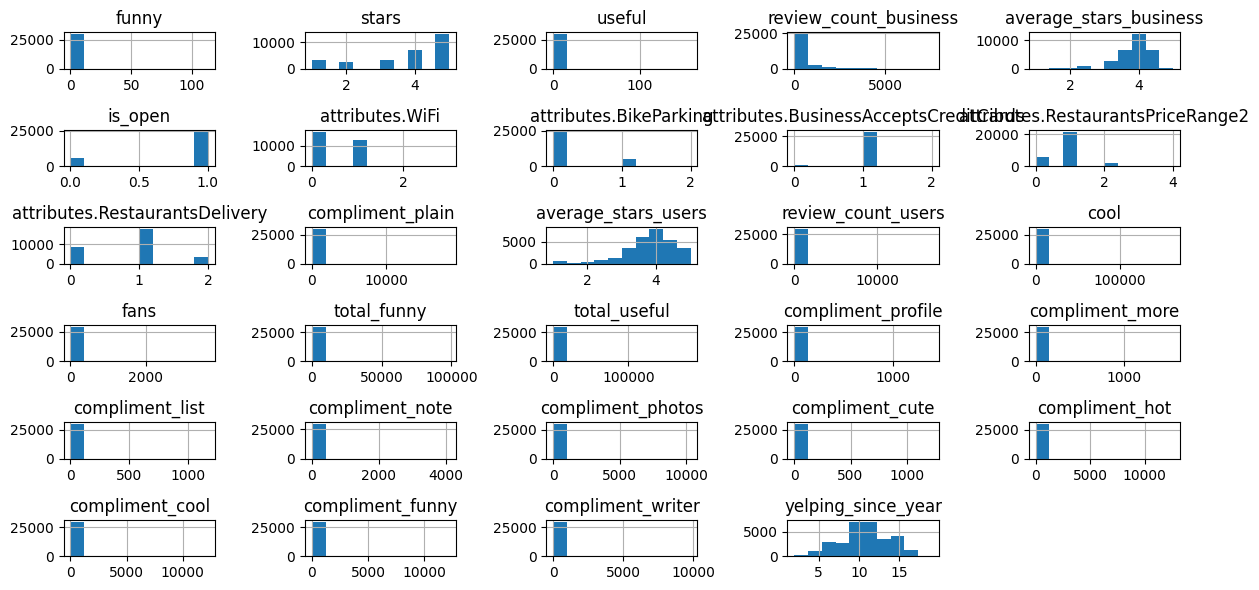

In [ ]:
final_df.hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

The `final_df` is good for the data modeling.

### 2.2 Define X and y for model training

We are interested in the ratings given by customers. So the `y` should contain `stars` as the output.

As for `X`, we need to include the remaining columns.

In [ ]:
# Define X
X = final_df[['total_funny', # 19 attributes from users' side
              'total_useful',
              'review_count_users',
              'average_stars_users',
              'cool',
              'fans',
              'compliment_profile',
              'compliment_more',
              'compliment_list',
              'compliment_plain',
              'compliment_note',
              'compliment_photos',
              'compliment_cute',
              'compliment_hot',
              'compliment_cool',
              'compliment_funny',
              'compliment_writer',
              'yelping_since_year',
              'review_count_business', # 8 attributes from business side
              'average_stars_business',
              'is_open',
              'attributes.WiFi',
              'attributes.BikeParking',
              'attributes.BusinessAcceptsCreditCards',
              'attributes.RestaurantsPriceRange2',
              'attributes.RestaurantsDelivery']].copy()
# Define y
y = final_df['stars']

### 2.3 Create training and testing dataset

Then we need to split the data into training and testing dataset with `test_size=0.2` and `random_state=42`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.4 Scale the dataset

To prevent additional effects brought by the range of value distribution, we need to user `StandardScaler()` to transform the dataset.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_reg_train_scaled = scaler.transform(X_train)
X_reg_test_scaled = scaler.transform(X_test)

### 2.5 Create and implement linear regression model

Then we are good to instantiate the linear regression model and fit the training dataset.

After that we will predict the values based on `X_test`.

In [ ]:
model = LinearRegression()
model.fit(X_reg_train_scaled, y_train)
# Predict the outcomes
y_pred_train = model.predict(X_reg_train_scaled)
y_pred_test = model.predict(X_reg_test_scaled)

### 2.6 Evaluate the model performance

To evaluate the performance on training and testing dataset, we will use **mean squared error** as the indicator.

In [ ]:
mse_training = mean_squared_error(y_train, y_pred_train)
mse_training

1.1526588140538354

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

1.164552306323344

It can be concluded that the MSE for both training and testing dataset are almost the same. There are no overfitting or underfitting issues.

## 3 Intepret the model

### 3.1 Correlation heatmap

First we need to generate the correlation matrix for the model.

In [ ]:
correlation = final_df.corr()
correlation

<ipython-input-74-0ace1a67574e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = final_df.corr()


,funny,stars,useful,review_count_business,average_stars_business,is_open,attributes.WiFi,attributes.BikeParking,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsPriceRange2,...,compliment_more,compliment_list,compliment_note,compliment_photos,compliment_cute,compliment_hot,compliment_cool,compliment_funny,compliment_writer,yelping_since_year
funny,1.000000,-0.038970,0.837141,-0.005452,-0.003815,-0.017867,-0.001442,-0.001318,-0.004247,-0.005974,...,0.421021,0.202119,0.521850,0.584524,0.268039,0.588942,0.582512,0.582512,0.422744,0.090300
stars,-0.038970,1.000000,-0.026138,0.085255,0.403267,0.056800,0.006751,-0.046961,-0.012970,0.042876,...,-0.005396,-0.010900,0.004038,0.000911,-0.006902,-0.000487,0.001946,0.001946,0.000547,0.008932
useful,0.837141,-0.026138,1.000000,-0.027971,0.015039,-0.018257,-0.004346,-0.005359,-0.002953,0.003222,...,0.397519,0.167629,0.549523,0.592359,0.242538,0.566366,0.584736,0.584736,0.419039,0.119829
review_count_business,-0.005452,0.085255,-0.027971,1.000000,0.195087,0.169880,0.098537,-0.027305,-0.087511,0.202326,...,0.001285,-0.000419,-0.002999,0.000325,0.000356,0.003001,0.001771,0.001771,0.006533,0.052456
average_stars_business,-0.003815,0.403267,0.015039,0.195087,1.000000,0.117295,0.008861,-0.097784,-0.016727,0.105396,...,0.003556,-0.002305,0.009441,0.011278,0.001045,0.011461,0.009577,0.009577,0.008572,0.006971
is_open,-0.017867,0.056800,-0.018257,0.169880,0.117295,1.000000,-0.001299,0.024672,0.013864,0.031387,...,-0.011354,-0.004245,-0.013849,-0.004217,-0.005309,-0.008967,-0.010253,-0.010253,-0.011868,-0.118823
attributes.WiFi,-0.001442,0.006751,-0.004346,0.098537,0.008861,-0.001299,1.000000,0.037617,-0.123008,-0.032412,...,-0.006792,-0.004064,-0.009324,-0.004967,-0.007192,-0.005998,-0.006810,-0.006810,-0.004065,0.063900
attributes.BikeParking,-0.001318,-0.046961,-0.005359,-0.027305,-0.097784,0.024672,0.037617,1.000000,0.031121,0.058628,...,0.001506,0.005292,0.000445,-0.005620,0.003915,0.000524,-0.000446,-0.000446,0.001561,-0.028771
attributes.BusinessAcceptsCreditCards,-0.004247,-0.012970,-0.002953,-0.087511,-0.016727,0.013864,-0.123008,0.031121,1.000000,0.062688,...,-0.016048,-0.027733,-0.005051,0.001986,-0.024398,-0.005459,-0.005670,-0.005670,-0.004064,-0.043156
attributes.RestaurantsPriceRange2,-0.005974,0.042876,0.003222,0.202326,0.105396,0.031387,-0.032412,0.058628,0.062688,1.000000,...,-0.001158,-0.006086,-0.008991,-0.005397,-0.005655,-0.006132,-0.007930,-0.007930,-0.000213,0.030414


The heatmap of the correlation relationships can be depicted as below.

Text(0.5, 1.0, 'Correlation Heatmap of Model')

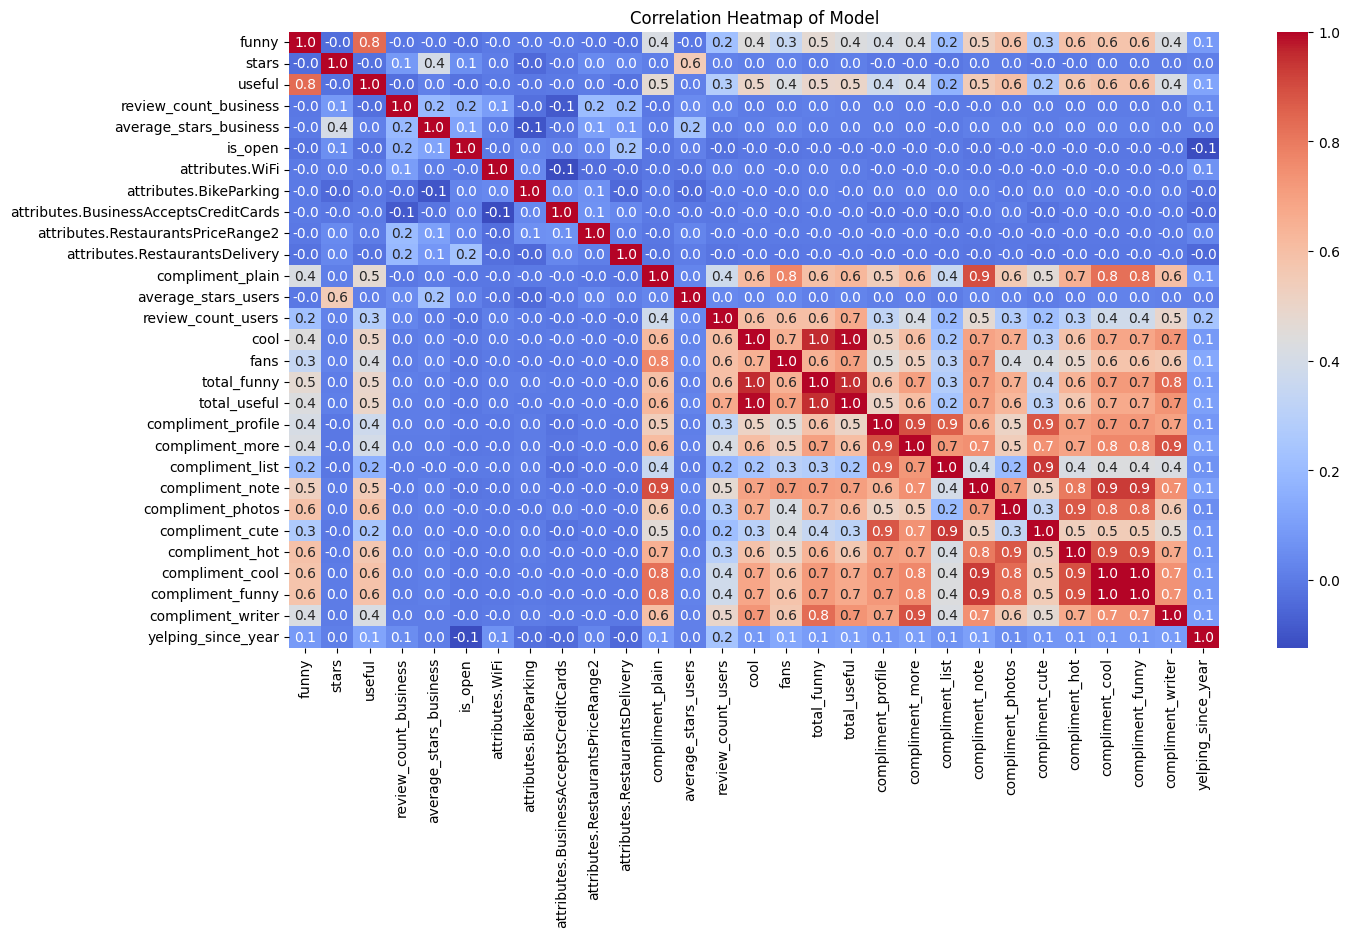

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap of Model')

### 3.2 Coefficient Plot for the most important attribute(s)

To find out the most important indicators in the dataset that affects `stars`, we can plot the coefficients of the model.

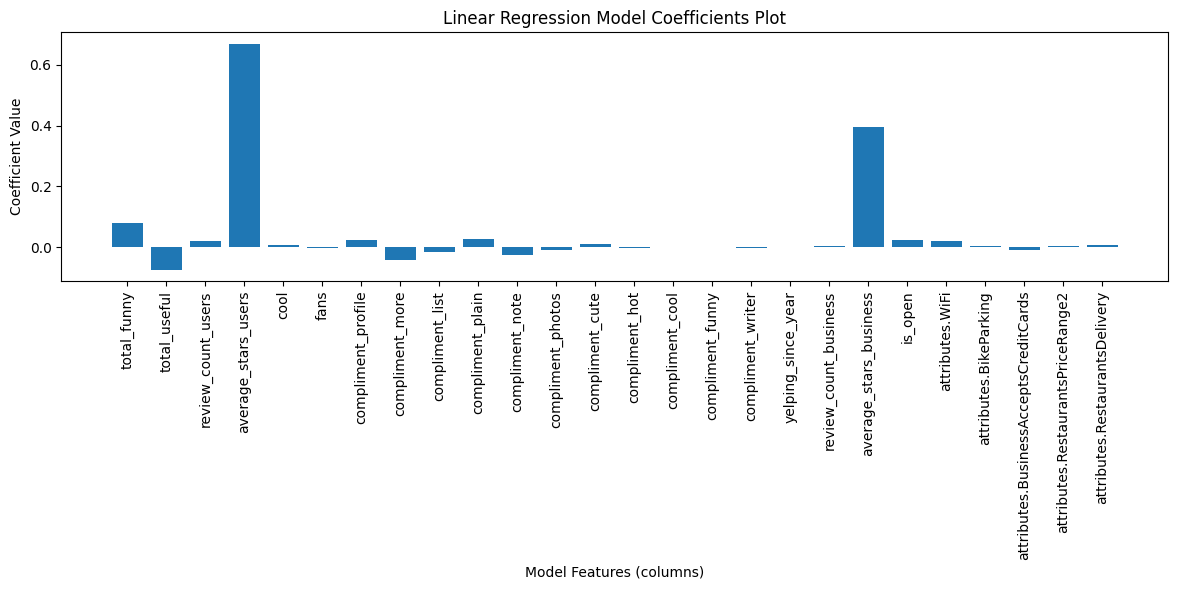

In [ ]:
features = X_train.columns
reg_coef = model.coef_
plt.figure(figsize=(12, 6))
plt.bar(features, reg_coef)
plt.xlabel('Model Features (columns)')
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Model Coefficients Plot')
plt.tight_layout()

It can be found in the order of correlation matrix that the average stars given by users `average_stars_users` and gained by the business `average_stars_business` are the most important indicators for the rating the users are likely to make.

From business side, the most important factor is `attributes.WiFi`.

### 3.3 Actual vs predicted scatter plot

To visualize model performance, we need to draw a scatter plot to show the relationship between actual values and predicted values.

Text(0.5, 1.0, 'Actual Vs Model Predicted Scatterplot')

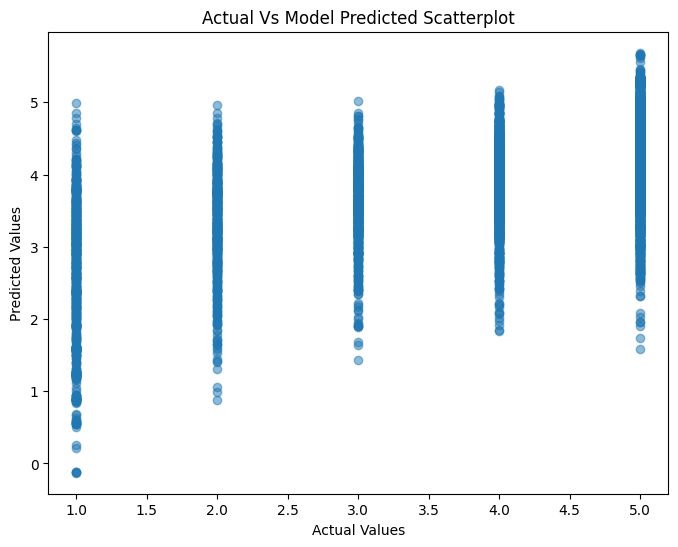

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual Vs Model Predicted Scatterplot")

## 4 Conclusion

By conducting the data analytics, we have reached the conclusions including:

1. We have successfully built the model `model` to predict the rating the customers are likely to give to the business.
2. The most crucial indicators are the average rating for both customers and business.
3. To obtain higher ratings, the business should focus on providing WiFi service.